In [17]:
import tensorflow as tf
import numpy as np
import random

# Set random seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)


In [18]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# Define the stock ticker symbol and the time range
ticker_symbol = 'NVDA'
end_date = datetime.today()
start_date = end_date - timedelta(days=90)

# Retrieve the historical stock data
nvidia_stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the data
print(nvidia_stock_data)

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-05-10   90.305000   91.401001   89.226997   89.877998   89.870613   
2024-05-13   90.477997   90.998001   88.528999   90.399002   90.391579   
2024-05-14   89.598999   91.651001   88.933998   91.356003   91.348495   
2024-05-15   92.472000   94.862000   91.598999   94.629997   94.622223   
2024-05-16   94.910004   95.819000   94.102997   94.359001   94.351250   
...                ...         ...         ...         ...         ...   
2024-08-02  103.760002  108.720001  101.370003  107.269997  107.269997   
2024-08-05   92.059998  103.410004   90.690002  100.449997  100.449997   
2024-08-06  103.839996  107.709999  100.550003  104.250000  104.250000   
2024-08-07  107.809998  108.800003   98.690002   98.910004   98.910004   
2024-08-08  101.989998  102.070000   98.500000   98.500000   98.500000   

               Volume  
Date         

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Use only the 'Close' price for prediction
data = nvidia_stock_data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


In [20]:
# Split the data into training and validation sets
train_data_len = int(np.ceil(len(scaled_data) * 0.8))
train_data = scaled_data[0:train_data_len]
val_data = scaled_data[train_data_len - 30:]

x_train, y_train = [], []
x_val, y_val = [], []

for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])

for i in range(30, len(val_data)):
    x_val.append(val_data[i-30:i, 0])
    y_val.append(val_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_val, y_val = np.array(x_val), np.array(y_val)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Add early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# Train the model with validation data
model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=32, epochs=100, callbacks=[early_stop])


  super().__init__(**kwargs)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.7080 - val_loss: 0.1130
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.5027 - val_loss: 0.0523
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.3379 - val_loss: 0.0185
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.2050 - val_loss: 0.0137
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.1018 - val_loss: 0.0457
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0333 - val_loss: 0.1250
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0100 - val_loss: 0.2455
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0365 - val_loss: 0.3405
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0770 - val_loss: 0.3594
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0886 - val_loss: 0.3203
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0723 - val_loss: 0.2567
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0464 - val_loss

In [22]:
from tensorflow.keras.layers import Dropout

# Build the LSTM model with Dropout regularization
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with validation data and early stopping
model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=32, epochs=100, callbacks=[early_stop])


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.5872 - val_loss: 0.0990
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.4266 - val_loss: 0.0505
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.3324 - val_loss: 0.0195
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.1832 - val_loss: 0.0111
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.1088 - val_loss: 0.0363
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0551 - val_loss: 0.1122
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0179 - val_loss: 0.2238
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0588 - val_loss: 0.3014
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0872 - val_loss: 0.2999
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0892 - val_loss: 0.2514
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0768 - val_loss: 0.1891
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0363 - val_loss

In [23]:
# Predict the next 10 days
last_lookback_days = scaled_data[-20:]
predicted_prices = []

for _ in range(10):
    last_lookback_days = np.reshape(last_lookback_days, (1, last_lookback_days.shape[0], 1))
    next_day_prediction = model.predict(last_lookback_days)
    next_day_price = scaler.inverse_transform(next_day_prediction)
    predicted_prices.append(next_day_price[0, 0])
    last_lookback_days = np.append(last_lookback_days[0, 1:], next_day_prediction)
    last_lookback_days = np.reshape(last_lookback_days, (20, 1))

print("Predicted prices for the next 10 days:", predicted_prices)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted prices for the next 10 days: [111.5612, 110.87456, 110.448395, 110.20939, 110.13925, 110.121216, 110.17302, 110.21941, 110.29522, 110.43725]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted prices for the next 20 days: [105.40512, 104.8175, 104.394424, 104.323685, 103.81129, 103.638695, 103.55529, 103.721855, 103.73519, 103.93788, 104.135376, 104.0713, 104.04016, 104.03053, 104.02651, 104.04252, 104.06405, 104.087326

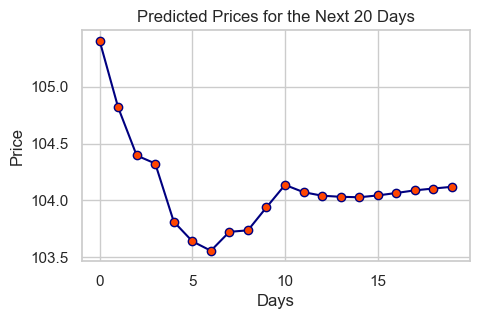

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Assume `model` and `scaler` are already defined and trained
# `scaled_data` is your existing dataset

LOOK_BACK_DAYS = 10
# Get the last 10 days of the lookback data
last_lookback_days = scaled_data[-LOOK_BACK_DAYS:]
predicted_prices = []

for _ in range(20):
    # Reshape the data to fit the model's expected input shape
    last_lookback_days = np.reshape(last_lookback_days, (1, last_lookback_days.shape[0], 1))
    
    # Predict the next day's price
    next_day_prediction = model.predict(last_lookback_days)
    
    # Inverse transform to get the actual price
    next_day_price = scaler.inverse_transform(next_day_prediction)
    
    # Append the predicted price to the list
    predicted_prices.append(next_day_price[0, 0])
    
    # Update the lookback days with the new prediction
    last_lookback_days = np.append(last_lookback_days[0, 1:], next_day_prediction)
    last_lookback_days = np.reshape(last_lookback_days, (LOOK_BACK_DAYS, 1))

print("Predicted prices for the next 20 days:", predicted_prices)

# Plotting the predicted prices
plt.figure(figsize=(5, 3))
plt.plot(predicted_prices, marker='o', linestyle='-', mfc='orangered', color='navy')
plt.title('Predicted Prices for the Next 20 Days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.grid(True)
plt.show()


In [36]:
import numpy as np
import plotly.graph_objs as go
import plotly.express as px

# Assume `model` and `scaler` are already defined and trained
# `scaled_data` is your existing dataset

# Function to predict prices based on a given lookback period
def predict_prices(look_back_days, model, scaler, scaled_data):
    # Get the last `look_back_days` of the lookback data
    last_lookback_days = scaled_data[-look_back_days:]
    predicted_prices = []

    for _ in range(20):
        # Reshape the data to fit the model's expected input shape
        last_lookback_days = np.reshape(last_lookback_days, (1, last_lookback_days.shape[0], 1))
        
        # Predict the next day's price
        next_day_prediction = model.predict(last_lookback_days)
        
        # Inverse transform to get the actual price
        next_day_price = scaler.inverse_transform(next_day_prediction)
        
        # Append the predicted price to the list
        predicted_prices.append(next_day_price[0, 0])
        
        # Update the lookback days with the new prediction
        last_lookback_days = np.append(last_lookback_days[0, 1:], next_day_prediction)
        last_lookback_days = np.reshape(last_lookback_days, (look_back_days, 1))
    
    return predicted_prices

# Initialize Plotly figure
fig = go.Figure()

# Adding traces for lookback values from 2 to 15 days
for look_back_days in range(2, 16):
    predicted_prices = predict_prices(look_back_days, model, scaler, scaled_data)
    
    # Add the line plot for each lookback period
    fig.add_trace(go.Scatter(
        x=list(range(1, 21)),  # Days from 1 to 20
        y=predicted_prices,
        mode='lines+markers',
        name=f'Lookback: {look_back_days} days',
        marker=dict(size=6),
        line=dict(width=2)
    ))

# Update layout for better visualization
fig.update_layout(
    title='Predicted Prices for the Next 20 Days with Varying Lookback Periods',
    xaxis_title='Days',
    yaxis_title='Price',
    template='plotly_white',
    legend_title='Lookback Periods',
    hovermode='x unified'
)

# Show the interactive plot
fig.write_html("predicted_prices_plot.html")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━